In [46]:
import pandas as pd
import os

data_dir = 'data/'

subjects = os.listdir(data_dir)

reason_all = []
location_all = []
reason_subject = []
for (i,subject) in enumerate(subjects):
    print i,
    samp_dirs = os.listdir(data_dir+subject)
    reason_subject.append([])
    for samp_dir in samp_dirs:
        filename = data_dir + subject + '/' + samp_dir + '/' + 'eml.csv'
        if os.path.exists(filename):
            eml = pd.read_csv(filename, delimiter='\t', header=None)
            
            # reason for visiting
            reason = eml.loc[0,7]
            reason = reason.replace('"','')
            reason = reason.replace('[','')
            reason = reason.replace(']','')
            reason = reason.replace(' ','')
            
            # sorting if there are multipe reasons
            if ',' in reason:
                reason_parsed = reason.split(',')
                reason_parsed = sorted(reason_parsed)
                reason = ','.join(reason_parsed)
            
            reason_all.append(reason)
            reason_subject[i].append(reason)
            
            # location type
            location = eml.loc[0,6]
            location = location.replace('"','')
            location = location.replace('[','')
            location = location.replace(']','')
            location_all.append(location)
            
            


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

KeyboardInterrupt: 

(-1, 20)

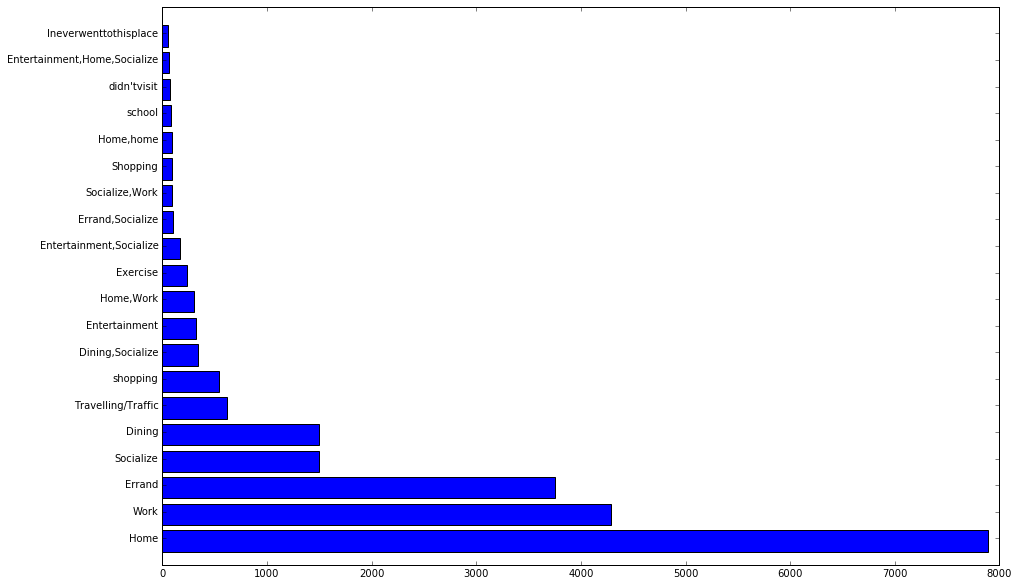

In [41]:
# overall frequency

reason_uniq = list(set(reason_all))
freq = [reason_all.count(x) for x in reason_uniq]

ind_sort = sorted(range(len(freq)), key=lambda k: freq[k], reverse=True)
freq_sorted = [freq[x] for x in ind_sort]
reason_uniq_sorted = [reason_uniq[x] for x in ind_sort]

freq_sorted_top = freq_sorted[:20]
reason_uniq_sorted_top = reason_uniq_sorted[:20]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(15,10))
plt.barh(np.arange(len(freq_sorted_top))-.5, np.array(freq_sorted_top));
plt.yticks(np.arange(len(freq_sorted_top)), reason_uniq_sorted_top);
plt.ylim(-1,len(freq_sorted_top))

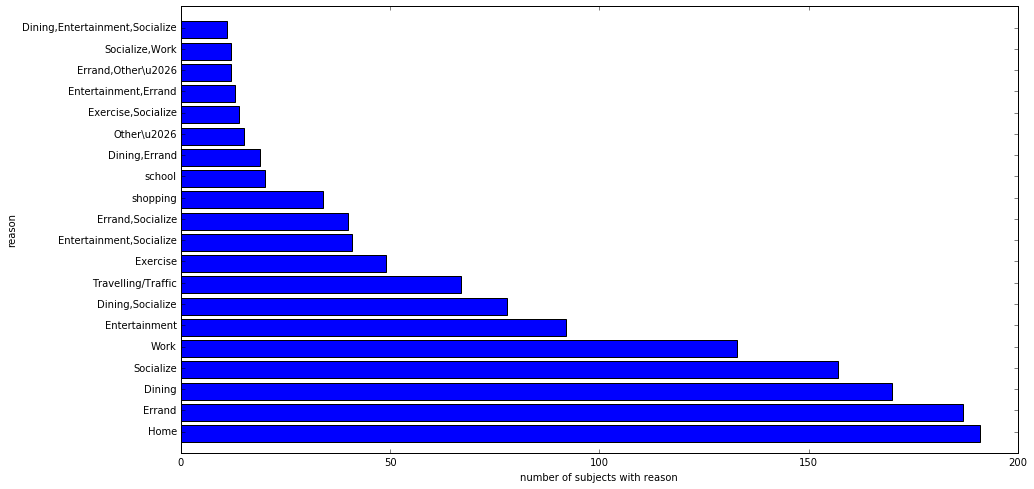

In [44]:
# subject-wise frequency

import pickle
save_results = True

freq = []
for i in range(len(reason_uniq)):
    freq.append(0)
    for j in range(len(subjects)):
        if reason_uniq[i] in reason_subject[j]:
            freq[i] += 1

ind_sort = sorted(range(len(freq)), key=lambda k: freq[k], reverse=True)
freq_sorted = [freq[x] for x in ind_sort]
reason_uniq_sorted = [reason_uniq[x] for x in ind_sort]

freq_sorted_top = freq_sorted[:20]
reason_uniq_sorted_top = reason_uniq_sorted[:20]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize=(15,8))
plt.barh(np.arange(len(freq_sorted_top))-.5, np.array(freq_sorted_top));
plt.yticks(np.arange(len(freq_sorted_top)), reason_uniq_sorted_top);
plt.ylim(-1,len(freq_sorted_top))
plt.xlabel('number of subjects with reason')
plt.ylabel('reason')

if save_results:
    with open('top10reason.dat', 'w') as file_out:
        pickle.dump(reason_uniq_sorted[:10], file_out)
    file_out.close()

In [39]:
print reason_parsed

[' Errand', 'school']


In [8]:
location_uniq = list(set(location_all))
freq = [location_all.count(x) for x in location_uniq]
ind_sort = sorted(range(len(freq)), key=lambda k: freq[k], reverse=True)

location_uniq_sorted = [location_uniq[x] for x in ind_sort]

location_uniq_sorted_top = location_uniq_sorted[:20]

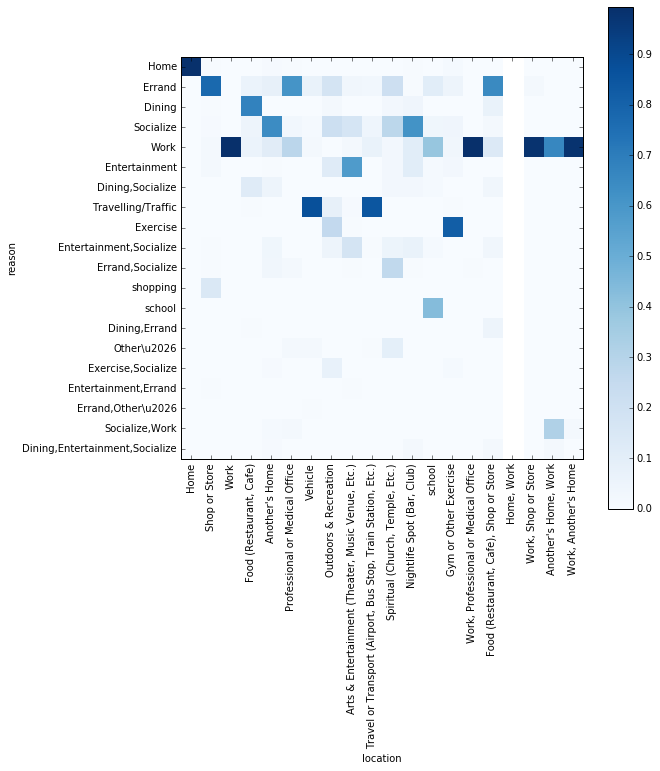

In [45]:
img = np.zeros([len(reason_uniq_sorted_top),len(location_uniq_sorted_top)])
for (i,_) in enumerate(reason_all):
    if reason_all[i] in reason_uniq_sorted_top and location_all[i] in location_uniq_sorted_top:
        ind_res = reason_uniq_sorted_top.index(reason_all[i])
        ind_loc = location_uniq_sorted_top.index(location_all[i])
        img[ind_res,ind_loc] += 1
#img_normalized = img.astype('float') / img.sum(axis=1)[:, np.newaxis]        
img_normalized = img.astype('float') / img.sum(axis=0)[np.newaxis,:]

plt.figure(figsize=(9,9))
plt.imshow(img_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.yticks(np.arange(len(reason_uniq_sorted_top)),reason_uniq_sorted_top)
plt.xticks(np.arange(len(location_uniq_sorted_top)),location_uniq_sorted_top,rotation=90)
plt.xlabel('location')
plt.ylabel('reason')
#plt.title()
plt.colorbar()
